In [154]:
import numpy as numpy
import pandas as pd

In [155]:
data = pd.read_csv("csvs/train.csv")

In [156]:
data

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [157]:
data.drop("id" , axis= 1,inplace=True)

In [158]:
data

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [159]:
data.drop("date",inplace=True,axis=1)

In [160]:
for i in list(set(data["store"].values)):
    print(i,"\n",data[data["store"]==i].describe(),"\n")

Stickers for Less 
            num_sold
count  74044.000000
mean     840.046418
std      688.522598
min        5.000000
25%      234.000000
50%      744.000000
75%     1247.000000
max     4444.000000 

Discount Stickers 
            num_sold
count  71531.000000
mean     427.775887
std      339.684324
min        5.000000
25%      142.000000
50%      380.000000
75%      624.000000
max     2488.000000 

Premium Sticker Mart 
            num_sold
count  75684.000000
mean     973.836240
std      814.581952
min        5.000000
25%      255.000000
50%      859.000000
75%     1459.000000
max     5939.000000 



In [161]:
data["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [162]:
#arranging in order of high mean
country_influ = ["Norway","Canada","Singapore","Italy","Finland","Kenya"]
store_influ = ["Premium Sticker Mart","Discount Stickers","Stickers for Less"]


In [163]:
import category_encoders as ce
oe = ce.OrdinalEncoder(mapping=[{'col': "country", 'mapping': {level: index for index, level in enumerate(country_influ)}}])
data=oe.fit_transform(data)
oe = ce.OrdinalEncoder(mapping=[{'col': "store", 'mapping': {level: index for index, level in enumerate(store_influ)}}])
data=oe.fit_transform(data)
le = ce.OrdinalEncoder()
data["product"]=le.fit_transform(data["product"])

<Axes: >

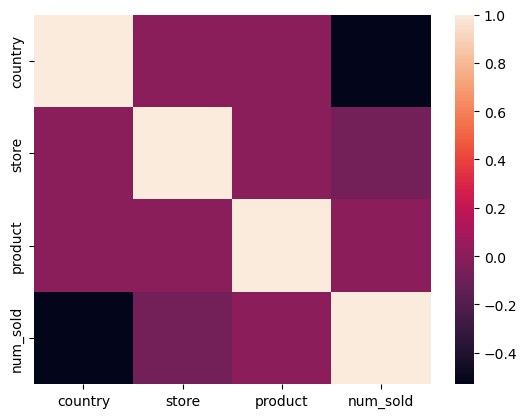

In [165]:
import seaborn as sns
sns.heatmap(data.corr())

In [188]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
data_imputed = knn.fit_transform(data)

In [190]:
a = data_imputed

In [191]:
data_imputed = pd.DataFrame(data_imputed)

In [192]:
data_imputed.columns = data.columns

In [195]:
data_imputed

,country,store,product,num_sold
0,1.0,1.0,1.0,549.333333
1,1.0,1.0,2.0,973.000000
2,1.0,1.0,3.0,906.000000
3,1.0,1.0,4.0,423.000000
4,1.0,1.0,5.0,491.000000
...,...,...,...,...
230125,2.0,0.0,1.0,466.000000
230126,2.0,0.0,2.0,2907.000000
230127,2.0,0.0,3.0,2299.000000
230128,2.0,0.0,4.0,1242.000000


In [194]:
for i in data.drop("num_sold",axis=1):
    data_imputed[i]=data_imputed[i].astype(str)

In [196]:
#for country,shop its better to use target encoding as it have good relation with numsold
import category_encoders as ce
te = ce.TargetEncoder()
for i in ["country","store"]:
    data_imputed[i]=te.fit_transform(X=data_imputed[i],y=data_imputed["num_sold"])

In [197]:
data_imputed

,country,store,product,num_sold
0,797.128102,419.162830,1.0,549.333333
1,797.128102,419.162830,2.0,973.000000
2,797.128102,419.162830,3.0,906.000000
3,797.128102,419.162830,4.0,423.000000
4,797.128102,419.162830,5.0,491.000000
...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000
230126,863.052379,962.599426,2.0,2907.000000
230127,863.052379,962.599426,3.0,2299.000000
230128,863.052379,962.599426,4.0,1242.000000


In [198]:
data

,country,store,product,num_sold
0,1,1,1,NaN
1,1,1,2,973.0
2,1,1,3,906.0
3,1,1,4,423.0
4,1,1,5,491.0
...,...,...,...,...
230125,2,0,1,466.0
230126,2,0,2,2907.0
230127,2,0,3,2299.0
230128,2,0,4,1242.0


<Figure size 640x480 with 0 Axes>

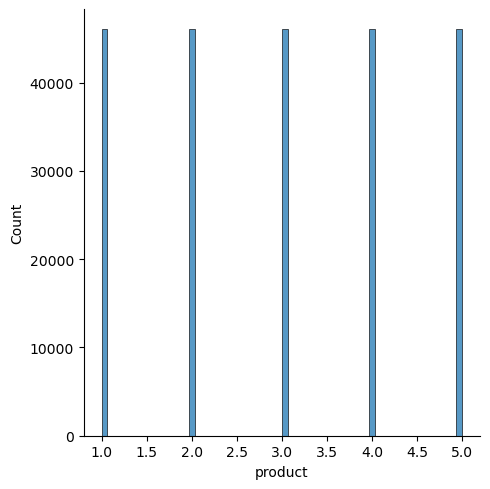

In [201]:
import matplotlib.pyplot as plt
plt.figure()
sns.displot(data["product"])
plt.show()